In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from scipy.stats import bootstrap

1. (аналогично Заданию 2) Используя make_blobs с любым random_state, сгенерировать датасет df, в котором есть три класса с размером каждого класса 100, четыре количественных (недискретных) признака ,а центры классов зафиксированы в следующих точках: Класс 0 – (+1, +1, +1, +1), Класс 1 – (-1,-1,-1,-1), Класс 2 – (-1,+1,-1,+1).

In [19]:
centers = [
    [+1, +1, +1, +1],  # 0
    [-1, -1, -1, -1],  # 1
    [-1, +1, -1, +1]   # 2
]

X, y = make_blobs(n_samples=300, centers=centers, n_features=4, random_state=42)

features = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4']
df1 = pd.DataFrame(X, columns=features)
df1['class'] = y
print(df1.head())

   Feature_1  Feature_2  Feature_3  Feature_4  class
0  -0.591747  -2.702584   0.029156  -0.527403      1
1   0.410635   1.849602   1.357015   0.307090      0
2  -0.354624   0.368632  -1.964923  -0.313949      1
3  -0.405246   1.853416  -0.241071   1.281191      2
4  -3.471645  -1.796895  -0.422928  -1.203045      1


2. Ключевые характеристики датасета, корреляции, визуализация на всех парах var

In [21]:
dataset_size = df1.shape
features_count = df1.shape[1] - 1
classes_count = df1['class'].value_counts()
non_type_percent = df1.isnull().mean() * 100
other = df1.describe()

print(f'1. Размерность всего датасета: {dataset_size}')
print(f'2. Количество признаков: {features_count}')
print(f'3. Количество целевых классов и объектов в каждом из классов:\n{classes_count}')
print(f'4. Процент объектов с неопределенными признаками:\n{non_type_percent}')
print(f'5. Иные ключевые характеристики датасета:\n{other}')

1. Размерность всего датасета: (300, 5)
2. Количество признаков: 4
3. Количество целевых классов и объектов в каждом из классов:
class
1    100
0    100
2    100
Name: count, dtype: int64
4. Процент объектов с неопределенными признаками:
Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
class        0.0
dtype: float64
5. Иные ключевые характеристики датасета:
        Feature_1   Feature_2   Feature_3   Feature_4       class
count  300.000000  300.000000  300.000000  300.000000  300.000000
mean    -0.290793    0.347177   -0.279180    0.376324    1.000000
std      1.302909    1.424841    1.359680    1.383420    0.817861
min     -3.650970   -2.804882   -3.696887   -3.301921    0.000000
25%     -1.232938   -0.567018   -1.250467   -0.548240    0.000000
50%     -0.372631    0.490000   -0.404749    0.459384    1.000000
75%      0.599307    1.342490    0.697384    1.422482    2.000000
max      3.314659    4.852731    3.189803    3.720169    2.000000


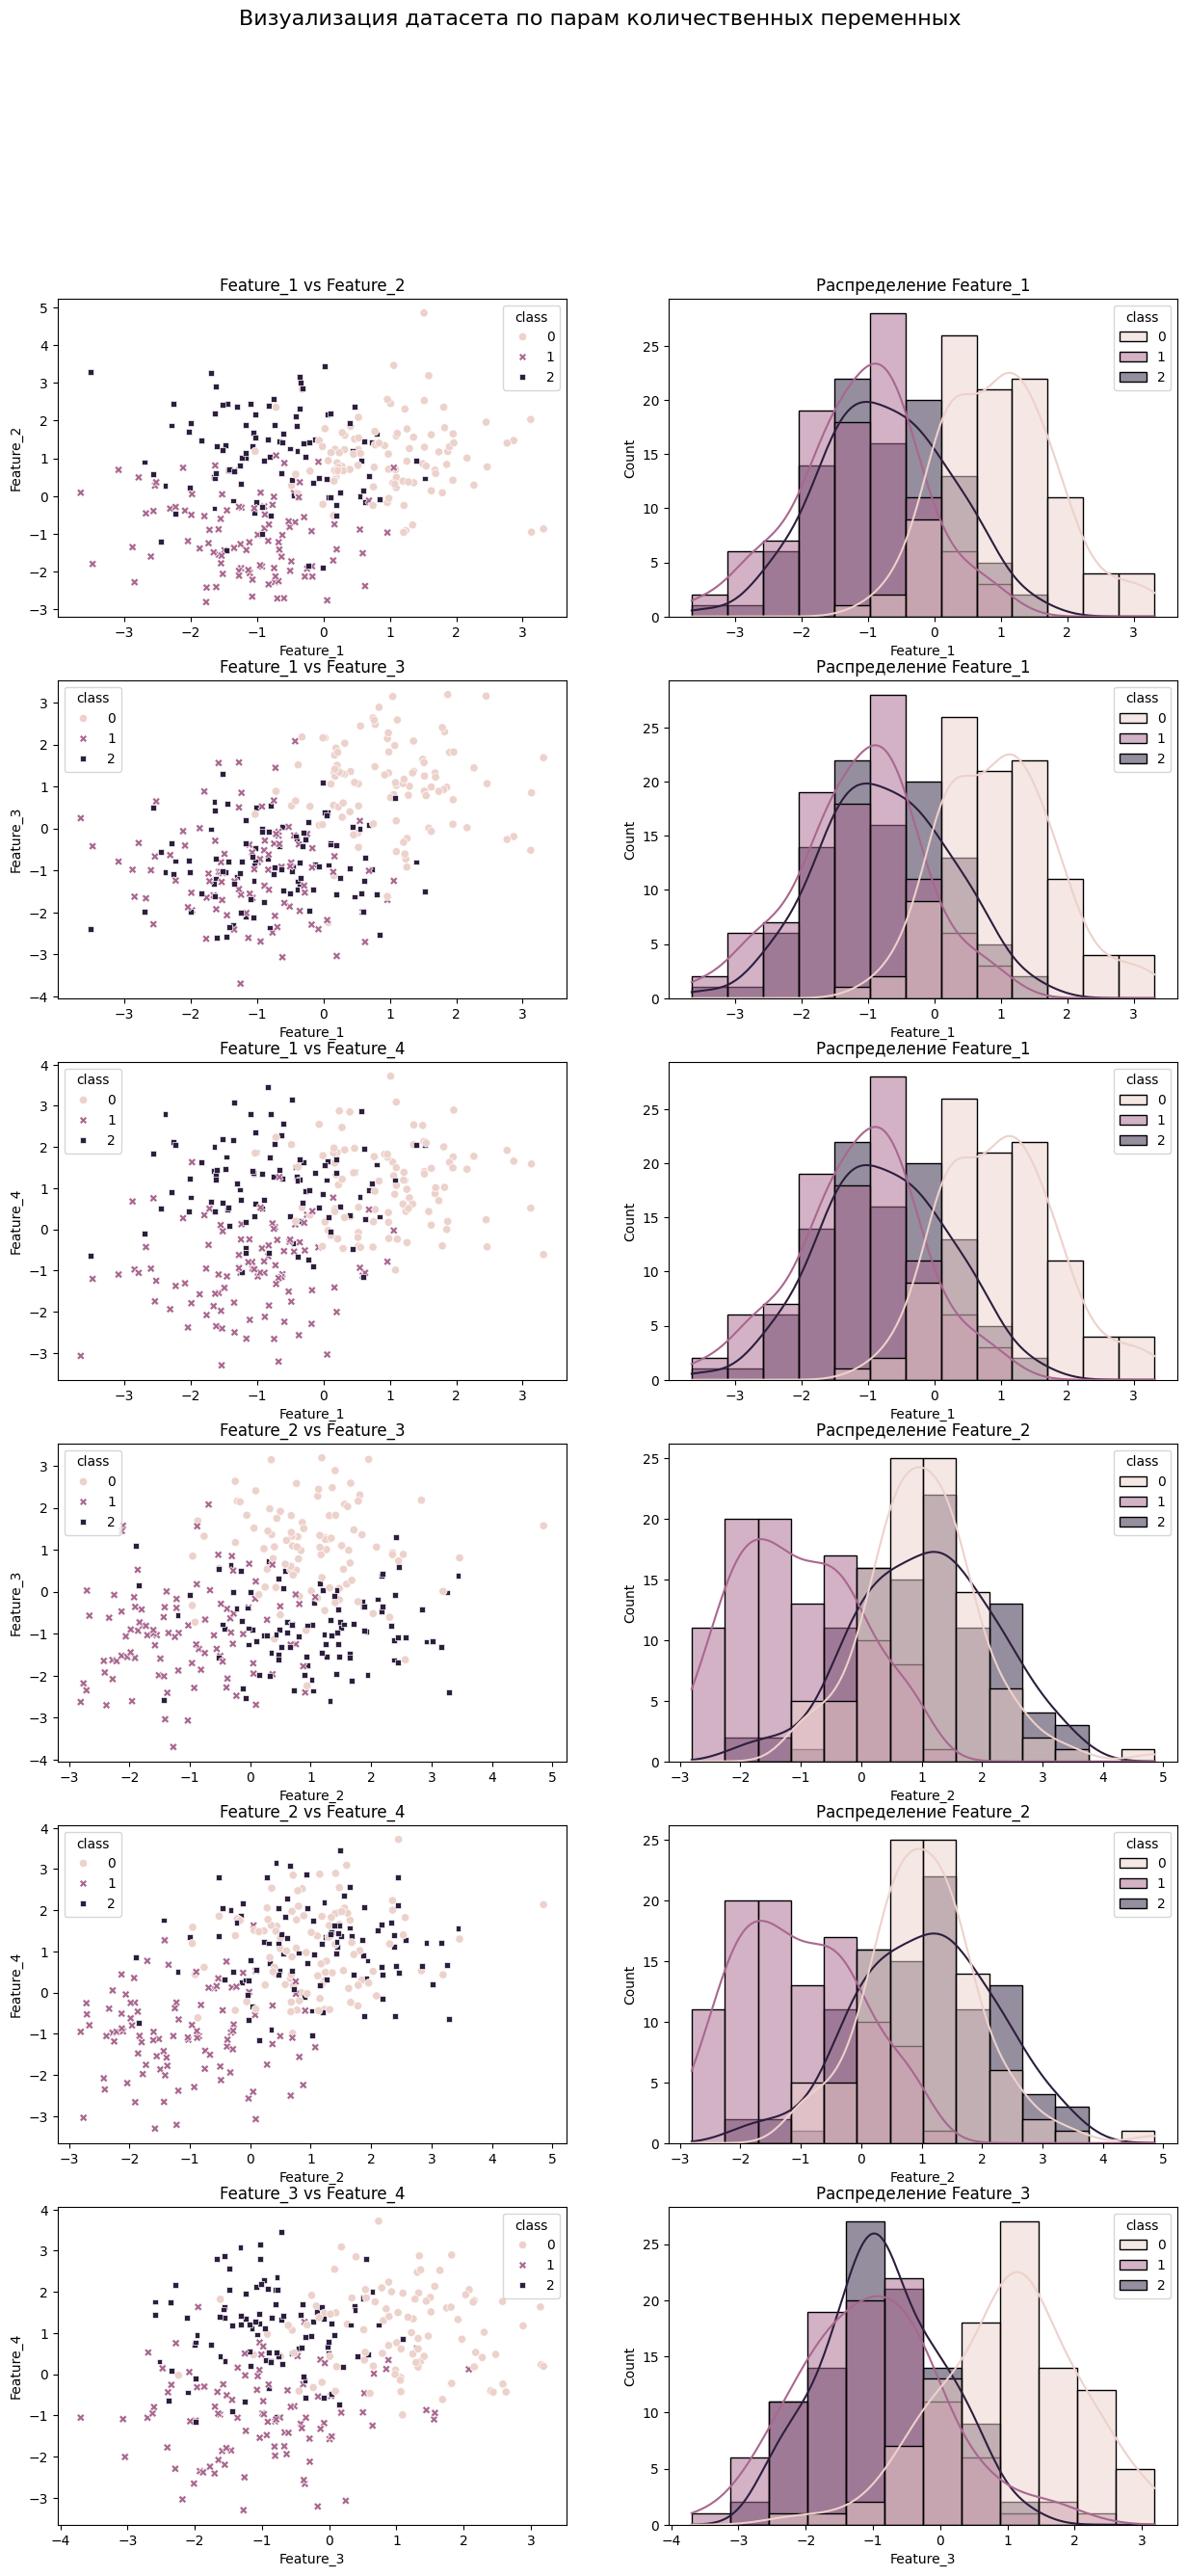

In [22]:
pairs_of_qu = [(features[i], features[j]) for i in range (len(features)) for j in range(i+1, len(features))]

fig, axes = plt.subplots(len(pairs_of_qu), 2, figsize=(15, 30))
fig.suptitle('Визуализация датасета по парам количественных переменных', fontsize=16)

for idx, (x_pair, y_pair) in enumerate(pairs_of_qu):
    ax1 = axes[idx, 0]
    sns.scatterplot(data=df1, x=x_pair, y=y_pair, hue='class', style='class', ax=ax1)
    ax1.set_title(f'{x_pair} vs {y_pair}')

    ax2 = axes[idx, 1]
    sns.histplot(data=df1, x=x_pair, hue='class', kde=True, ax=ax2)
    ax2.set_title(f'Распределение {x_pair}')

3. На основе созданного в пункте [1] датасета сгенерировать отдельные дополнительные датасеты (df_A_B), в которых к классу 0 добавлено A одинаковых точек с координатами (+B,-B,+B,-B), где A = 1, 10, 100 и B = 5, 10, 20, при этом количество объектов в остальных классах неизменно.

In [23]:
def add_points_to_class_0(df, A, B):
    new_points = pd.DataFrame([[B, -B, B, -B]] * A, columns=df.columns[:-1])
    new_points['class'] = 0  # 0

    df_A_B = pd.concat([df, new_points], ignore_index=True)
    return df_A_B

A_values = [1, 10, 100]
B_values = [5, 10, 20]

for A in A_values:
    for B in B_values:
        df_A_B = add_points_to_class_0(df1, A, B)

        print(f"\nДатасет df_A_{A}_B_{B}:")
        print(f"Размерность: {df_A_B.shape}")
        print(f"Количество объектов в каждом классе:\n{df_A_B['class'].value_counts()}")


Датасет df_A_1_B_5:
Размерность: (301, 5)
Количество объектов в каждом классе:
class
0    101
1    100
2    100
Name: count, dtype: int64

Датасет df_A_1_B_10:
Размерность: (301, 5)
Количество объектов в каждом классе:
class
0    101
1    100
2    100
Name: count, dtype: int64

Датасет df_A_1_B_20:
Размерность: (301, 5)
Количество объектов в каждом классе:
class
0    101
1    100
2    100
Name: count, dtype: int64

Датасет df_A_10_B_5:
Размерность: (310, 5)
Количество объектов в каждом классе:
class
0    110
1    100
2    100
Name: count, dtype: int64

Датасет df_A_10_B_10:
Размерность: (310, 5)
Количество объектов в каждом классе:
class
0    110
1    100
2    100
Name: count, dtype: int64

Датасет df_A_10_B_20:
Размерность: (310, 5)
Количество объектов в каждом классе:
class
0    110
1    100
2    100
Name: count, dtype: int64

Датасет df_A_100_B_5:
Размерность: (400, 5)
Количество объектов в каждом классе:
class
0    200
1    100
2    100
Name: count, dtype: int64

Датасет df_A_100_

4. Выбрать пару классов (включая класс с повторенными объектами) и один количественный признак.

Для каждого из датасетов df и df_A_B в своем пространстве Х-Y (количественный признак-класс) построить и визуализировать объекты, линию линейной регрессии и линию логистической регрессии. Регрессии строить на паре Х-Y (количественный признак-класс).

Оценить качество работы полученных на основе логистической регрессии классификаторов, используя ROC кривые, восстановив на графике ROC кривых точку классификации Sensitivity-Specificity и доверительные интервалы CI95 бутстрепом (n=1000).

Все полученные графики возможно расположить в две колонки: левая колонка – визуализация пространства и регрессий, правая – графики с ROC кривой и точкой

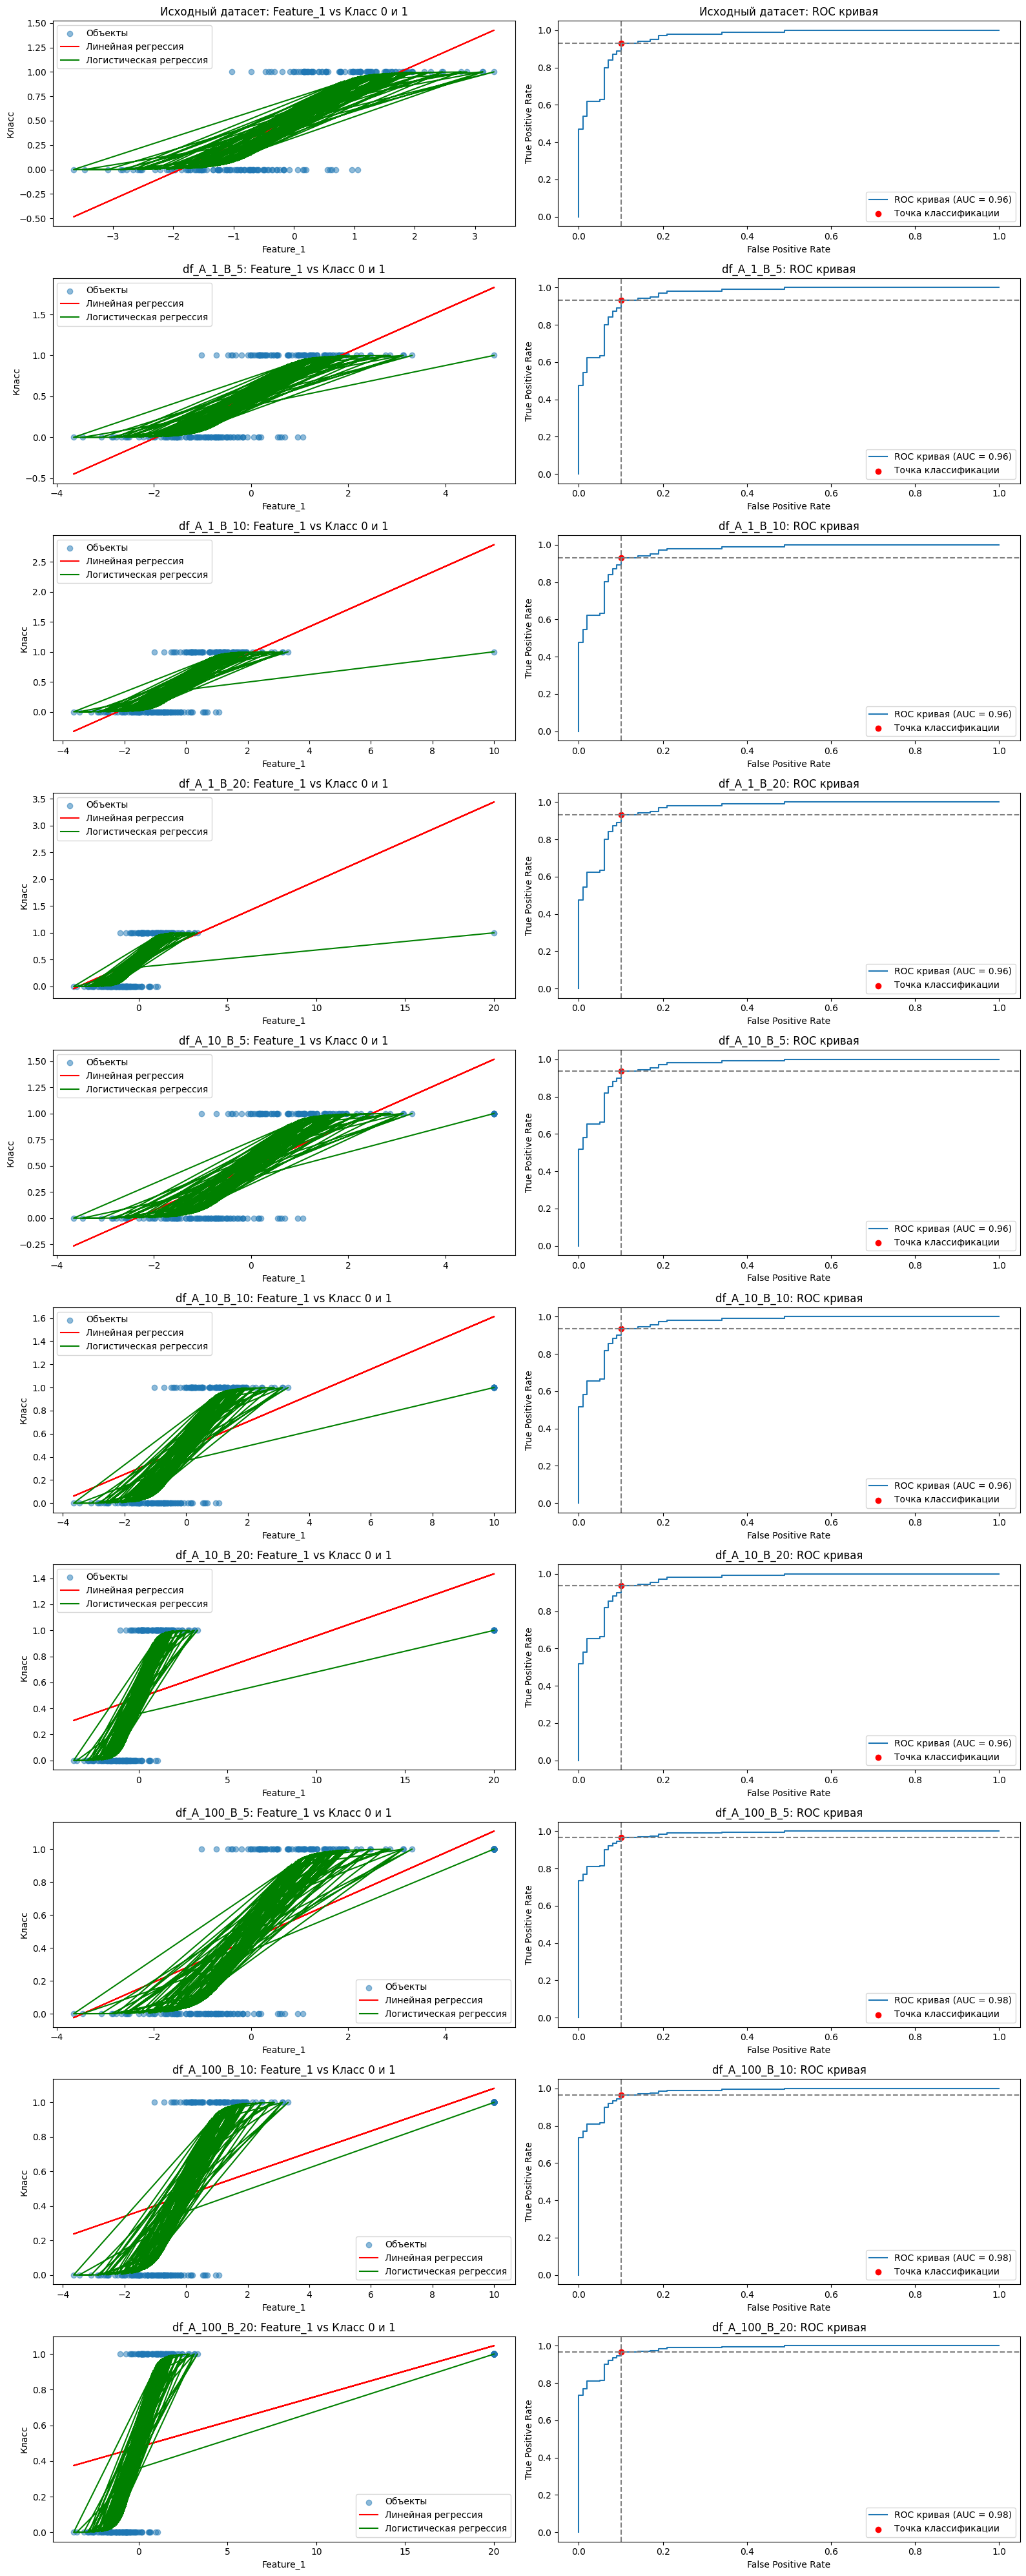

In [25]:
def plot_regression_and_roc(df, feature, class_pair, ax1, ax2):
    mask = df['class'].isin(class_pair)
    X = df.loc[mask, feature].values.reshape(-1, 1)
    y = df.loc[mask, 'class'].values

    y_binary = (y == class_pair[0]).astype(int)

    lin_reg = LinearRegression()
    lin_reg.fit(X, y_binary)
    y_lin_pred = lin_reg.predict(X)

    log_reg = LogisticRegression()
    log_reg.fit(X, y_binary)
    y_log_pred = log_reg.predict_proba(X)[:, 1]

    ax1.scatter(X, y_binary, alpha=0.5, label='Объекты')
    ax1.plot(X, y_lin_pred, color='red', label='Линейная регрессия')
    ax1.plot(X, y_log_pred, color='green', label='Логистическая регрессия')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Класс')
    ax1.legend()
    ax1.set_title(f'{feature} vs Класс {class_pair[0]} и {class_pair[1]}')

    fpr, tpr, _ = roc_curve(y_binary, y_log_pred)
    auc = roc_auc_score(y_binary, y_log_pred)


    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = _[optimal_idx]
    sensitivity = tpr[optimal_idx]
    specificity = 1 - fpr[optimal_idx]

    bootstrap_auc = bootstrap((y_binary, y_log_pred), statistic=roc_auc_score, n_resamples=1000, paired=True)
    ci_lower, ci_upper = bootstrap_auc.confidence_interval

    ax2.plot(fpr, tpr, label=f'ROC кривая (AUC = {auc:.2f})')
    ax2.scatter(1 - specificity, sensitivity, color='red', label='Точка классификации')
    ax2.axvline(x=1 - specificity, color='gray', linestyle='--')
    ax2.axhline(y=sensitivity, color='gray', linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend()
    ax2.set_title(f'ROC кривая с CI95 [{ci_lower:.2f}, {ci_upper:.2f}]')

feature = 'Feature_1'
class_pair = [0, 1]

datasets = {'Исходный датасет': df1}
for A in [1, 10, 100]:
    for B in [5, 10, 20]:
        datasets[f'df_A_{A}_B_{B}'] = add_points_to_class_0(df1, A, B)

fig, axes = plt.subplots(len(datasets), 2, figsize=(16, 4 * len(datasets)))
for i, (name, dataset) in enumerate(datasets.items()):
    plot_regression_and_roc(dataset, feature, class_pair, axes[i, 0], axes[i, 1])
    axes[i, 0].set_title(f'{name}: {feature} vs Класс {class_pair[0]} и {class_pair[1]}')
    axes[i, 1].set_title(f'{name}: ROC кривая')

plt.tight_layout()
plt.show()

5. Для выбранной пары классов (включая класс с повторенными объектами) на всех признаках вычислить уравнение множественной линейной регрессии, где Y – класс, Xi – признаки.

Используя полученные уравнения множественной линейной регрессии, на основе каждого из датасетов df и df_A_B сформировать новые датасеты logdf и logdf_A_B, в каждом из которых есть только один признак Х, сформированный на основе соответствующего уравнения множественной линейной регрессии, а переменная Y – отнесение к классу.

In [29]:
def compute_multiple_linear_regression(df, class_pair):
    mask = df['class'].isin(class_pair)
    X = df.loc[mask, df.columns[:-1]].values  #все признаки, кроме целевой переменной
    y = (df.loc[mask, 'class'] == class_pair[0]).astype(int).values  #бинарная целевая переменная

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    return lin_reg.coef_, lin_reg.intercept_

def create_logdf(df, coef, intercept, class_pair):
    mask = df['class'].isin(class_pair)
    X = df.loc[mask, df.columns[:-1]].values
    y = (df.loc[mask, 'class'] == class_pair[0]).astype(int).values

    X_log = np.dot(X, coef) + intercept

    logdf = pd.DataFrame({'X': X_log, 'Y': y})
    return logdf

class_pair = [0, 1]

coef, intercept = compute_multiple_linear_regression(df1, class_pair)

logdf = create_logdf(df1, coef, intercept, class_pair)

logdfs = {'logdf': logdf}
for A in [1, 10, 100]:
    for B in [5, 10, 20]:
        df_A_B = add_points_to_class_0(df1, A, B)
        logdf_A_B = create_logdf(df_A_B, coef, intercept, class_pair)
        logdfs[f'logdf_A_{A}_B_{B}'] = logdf_A_B

for name, logdf in logdfs.items():
    print(f"\n{name}:")
    print(logdf.head())


logdf:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_1_B_5:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_1_B_10:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_1_B_20:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_10_B_5:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_10_B_10:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_10_B_20:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_100_B_5:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_100_B_10:
          X  Y
0  0.117320  0
1  0.884209  1
2  0.306531  0
3 -0.257670  0
4 -0.307350  0

logdf_A_100_B_20:
          X  Y
0  0.117

6. Для каждого из датасетов logdf и logdf_A_B в своем пространстве Х-Y (количественный признак-класс) построить и визуализировать объекты, линию простой линейной регрессии и линию логистической регрессии. Регрессии строить на паре Х-Y (количественный признак-класс).

Оценить качество работы полученных на основе логистической регрессии классификаторов, используя ROC кривые и восстановив на графике ROC кривых точку классификации Sensitivity-Specificity и доверительные интервалы CI95. Все полученные графики возможно расположить в две колонки.


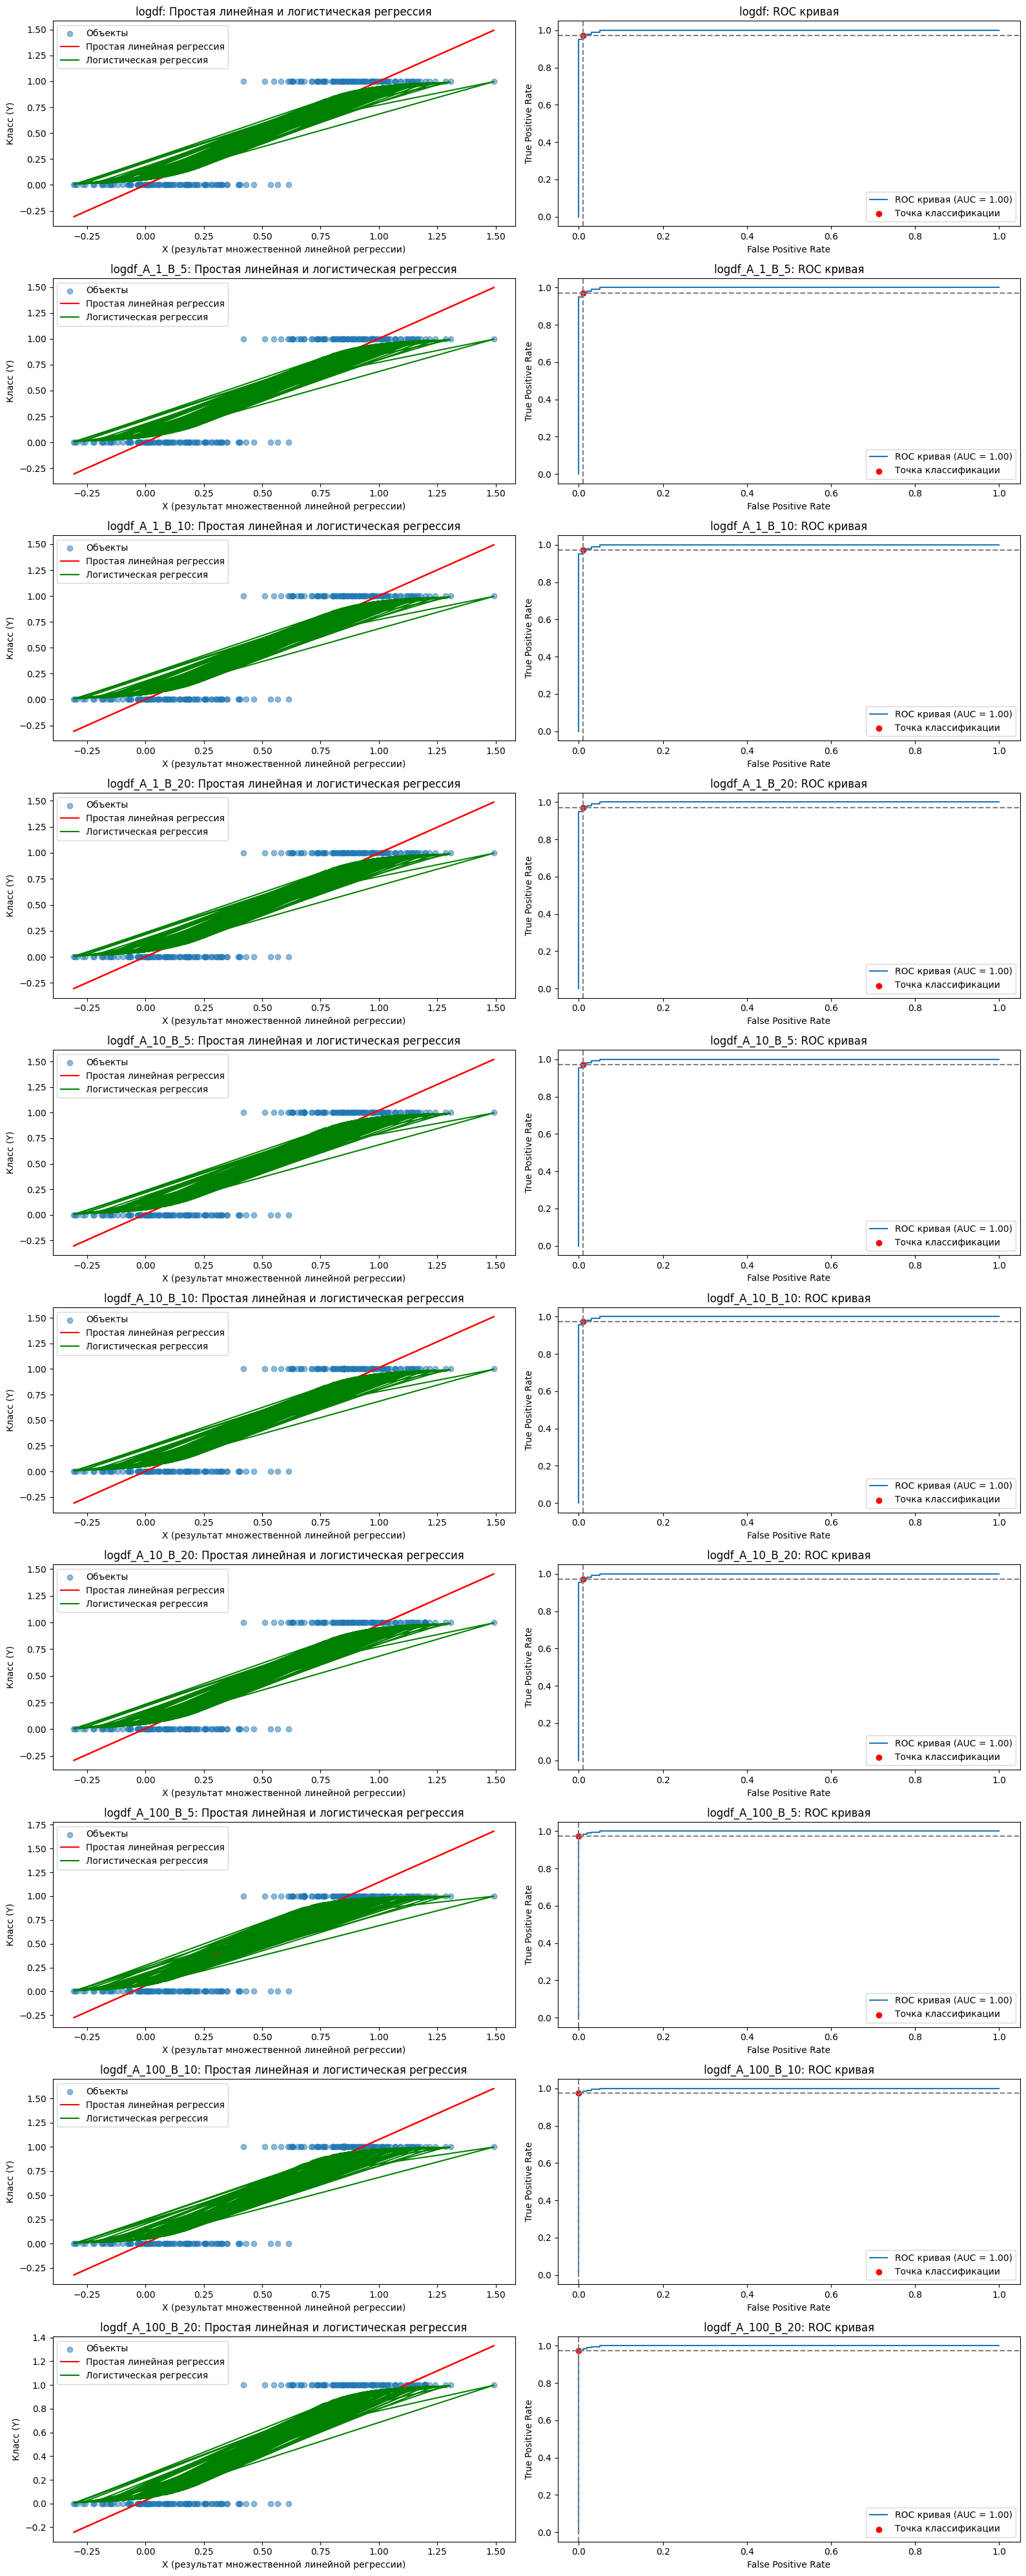

In [31]:
def plot_regression_and_roc(logdf, ax1, ax2):
    X = logdf['X'].values.reshape(-1, 1)
    y = logdf['Y'].values

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_lin_pred = lin_reg.predict(X)

    log_reg = LogisticRegression()
    log_reg.fit(X, y)
    y_log_pred = log_reg.predict_proba(X)[:, 1]

    ax1.scatter(X, y, alpha=0.5, label='Объекты')
    ax1.plot(X, y_lin_pred, color='red', label='Простая линейная регрессия')
    ax1.plot(X, y_log_pred, color='green', label='Логистическая регрессия')
    ax1.set_xlabel('X (результат множественной линейной регрессии)')
    ax1.set_ylabel('Класс (Y)')
    ax1.legend()
    ax1.set_title('Простая линейная и логистическая регрессия')

    fpr, tpr, _ = roc_curve(y, y_log_pred)
    auc = roc_auc_score(y, y_log_pred)


    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = _[optimal_idx]
    sensitivity = tpr[optimal_idx]
    specificity = 1 - fpr[optimal_idx]

    bootstrap_auc = bootstrap((y, y_log_pred), roc_auc_score, n_resamples=1000, paired=True)
    ci_lower, ci_upper = bootstrap_auc.confidence_interval

    ax2.plot(fpr, tpr, label=f'ROC кривая (AUC = {auc:.2f})')
    ax2.scatter(1 - specificity, sensitivity, color='red', label='Точка классификации')
    ax2.axvline(x=1 - specificity, color='gray', linestyle='--')
    ax2.axhline(y=sensitivity, color='gray', linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend()
    ax2.set_title(f'ROC кривая с CI95 [{ci_lower:.2f}, {ci_upper:.2f}]')

fig, axes = plt.subplots(len(logdfs), 2, figsize=(16, 4 * len(logdfs)))
for i, (name, logdf) in enumerate(logdfs.items()):
    plot_regression_and_roc(logdf, axes[i, 0], axes[i, 1])
    axes[i, 0].set_title(f'{name}: Простая линейная и логистическая регрессия')
    axes[i, 1].set_title(f'{name}: ROC кривая')

plt.tight_layout()
plt.show()

7. Для выбранной пары классов (включая класс с повторенными объектами), визуализировать один из датасетов df_A_B на всех парах переменных, построив на графиках объекты, линии множественной линейной регрессии, разделение классов на основе логистической регрессии решающей функцией с contour_plot уровнями классификации.

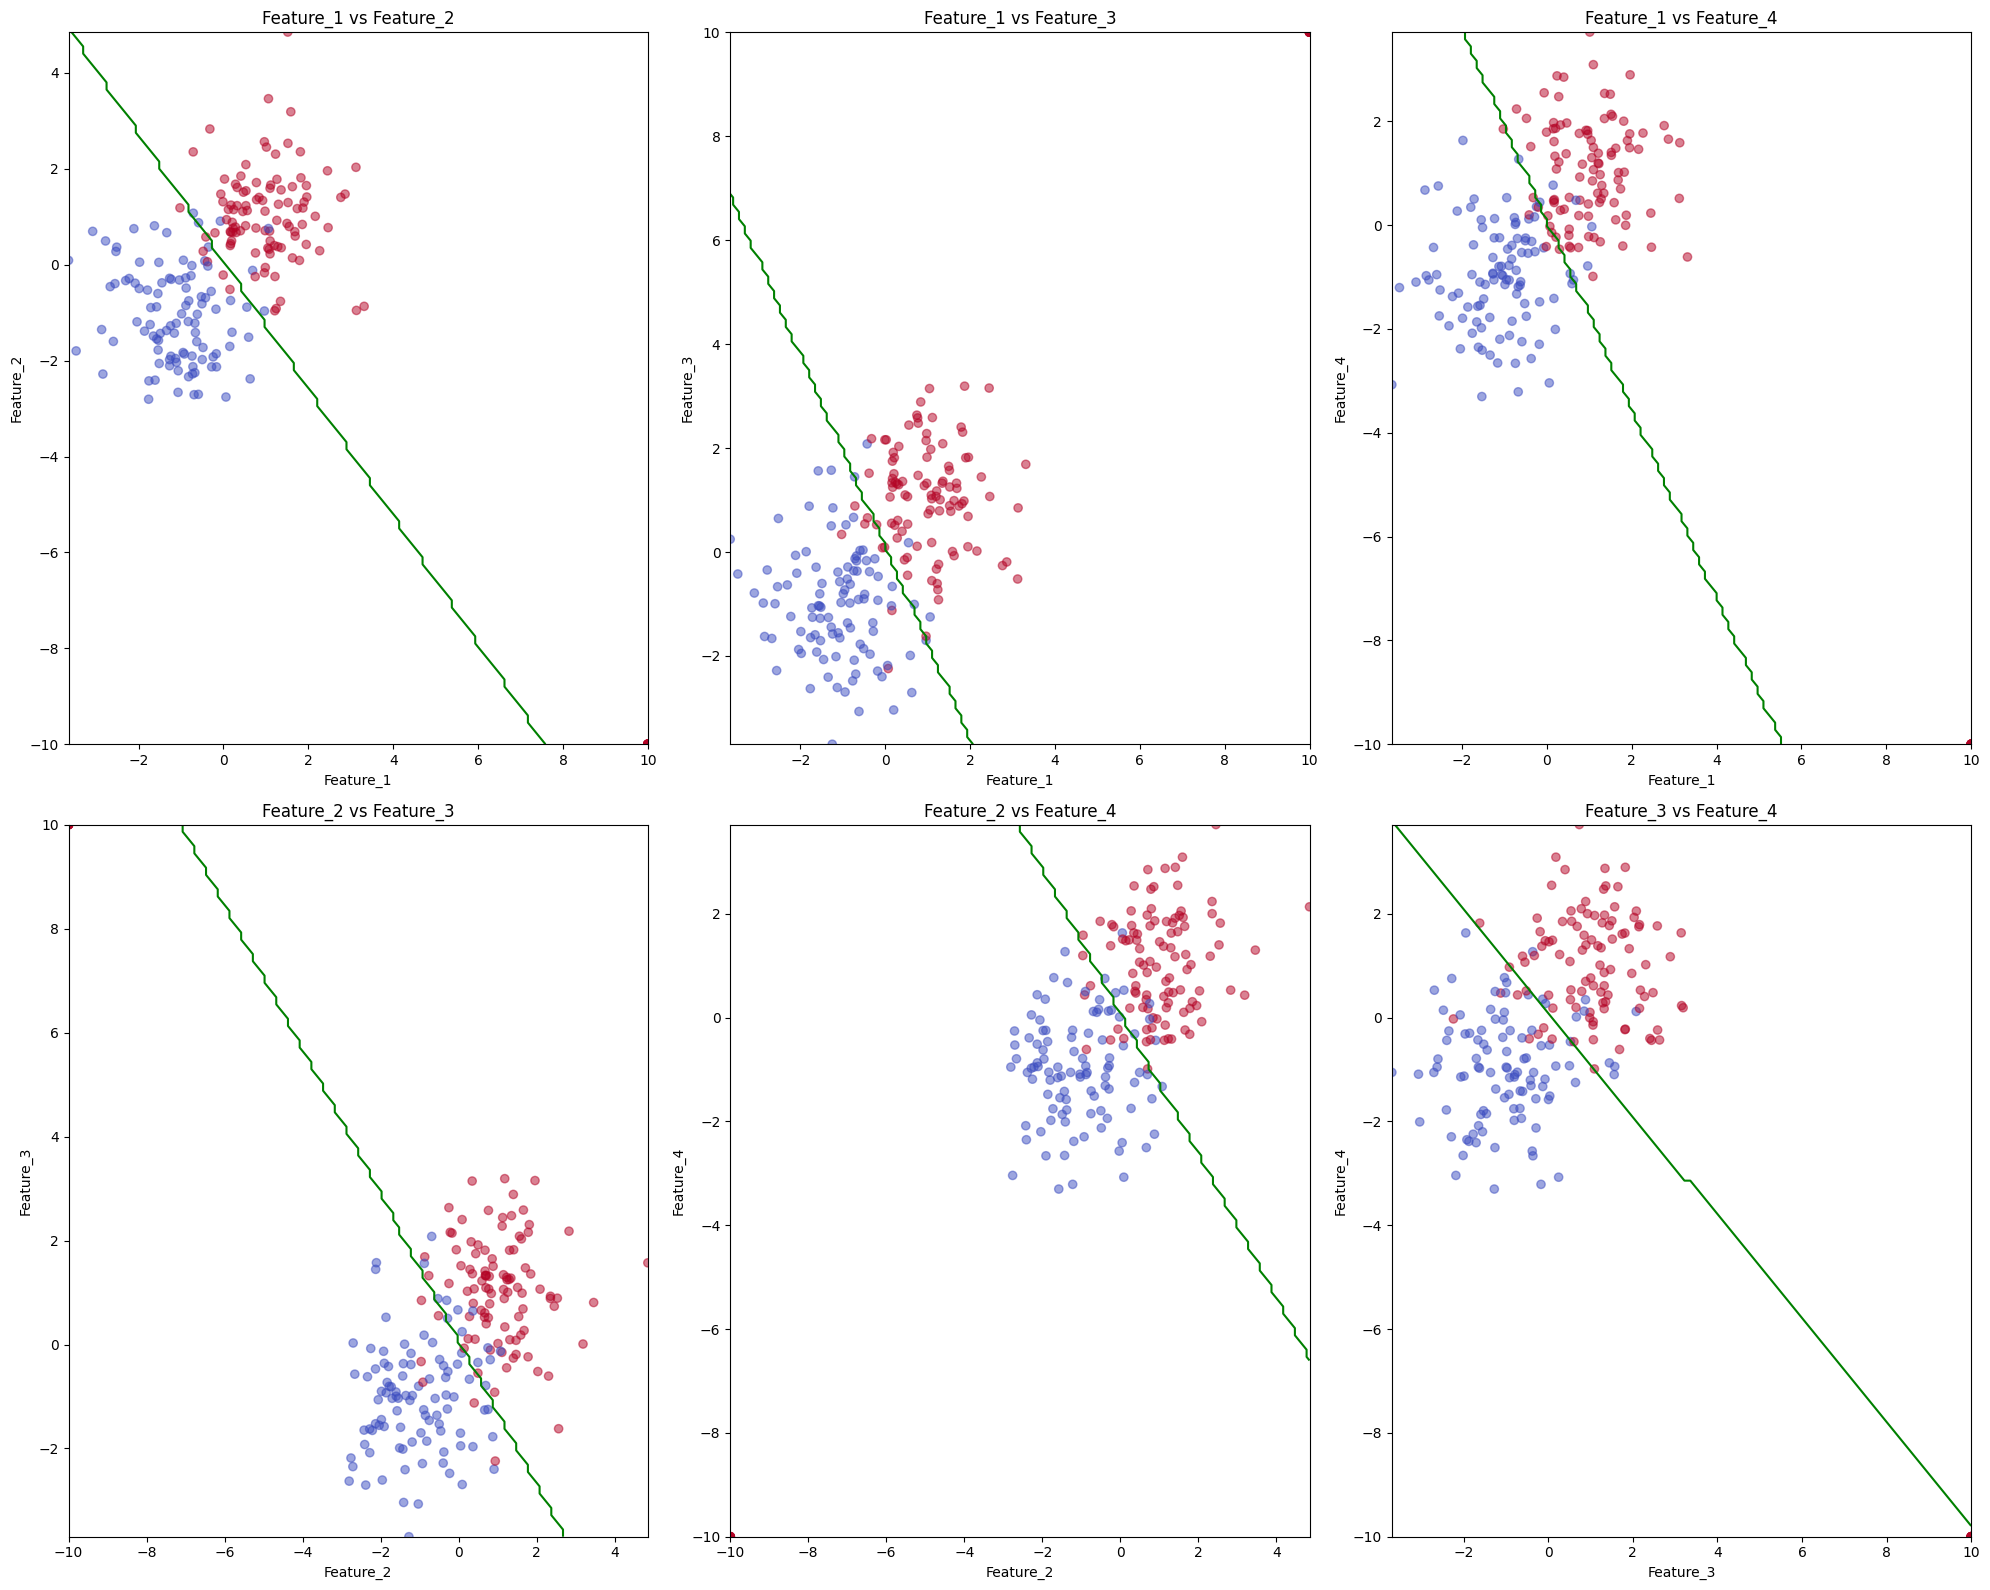

In [45]:
from itertools import combinations

def visualize_pairwise_regression(df, class_pair, ax):
    mask = df['class'].isin(class_pair)
    X = df.loc[mask, df.columns[:-1]].values
    y = (df.loc[mask, 'class'] == class_pair[0]).astype(int).values

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    feature_pairs = list(combinations(df.columns[:-1], 2))

    num_features = len(df.columns[:-1])
    for i, (feat1, feat2) in enumerate(feature_pairs):
        row = i // (num_features -1)
        col = i % (num_features - 1)

        if row >= len(ax):
          break
        if col >= len(ax[row]):
          break

        current_ax = ax[row, col]
        current_ax.scatter(df.loc[mask, feat1], df.loc[mask, feat2], c=y, cmap='coolwarm', alpha=0.5)
        current_ax.set_xlabel(feat1)
        current_ax.set_ylabel(feat2)
        current_ax.set_title(f'{feat1} vs {feat2}')


        x_range = np.linspace(df[feat1].min(), df[feat1].max(), 100)
        y_range = np.linspace(df[feat2].min(), df[feat2].max(), 100)
        xx, yy = np.meshgrid(x_range, y_range)

        X_grid = np.array([xx.ravel(), yy.ravel()]).T

        dummy_df = pd.DataFrame(X_grid, columns=[feat1, feat2])
        X_grid_full = pd.DataFrame(np.zeros((len(dummy_df), len(df.columns[:-1]))), columns=df.columns[:-1])
        for col in dummy_df.columns:
            X_grid_full[col] = dummy_df[col]



        y_log_pred = log_reg.predict(X_grid_full.values).reshape(xx.shape)
        current_ax.contour(xx, yy, y_log_pred, levels=[0.5], colors='green')

class_pair = [0, 1]

df_A_B = add_points_to_class_0(df1, 10, 10)

fig, axes = plt.subplots(len(df1.columns[:-3]), len(df1.columns[:-2]), figsize=(20, 16))
visualize_pairwise_regression(df_A_B, class_pair, axes)

plt.tight_layout()
plt.show()